In [2]:
#import libraries
%reset
import numpy as np
import matplotlib.pyplot as plt

global i,pi
i = np.complex(0,1)
pi = np.pi

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### Fermiverteilung Teilchendichte
\begin{equation}
n = \frac{N}{V}\\
 = 2 \cdot \frac{1}{8 \pi^3} \int_{-\infty}^\infty d^3k \frac{1}{e^{\frac{\epsilon_k-\mu}{k_B T}}+1}\\
 = \frac{1}{4 \pi^3} \int_0^\infty dk \int_0^{2 \pi} d\phi \int_0^\pi d\theta k^2 \sin(\theta) \frac{1}{e^{\frac{\epsilon_k-\mu}{k_B T}}+1}\\
 = \frac{1}{\pi^2} \int_0^\infty dk \frac{k^2}{e^{\frac{\epsilon_k - \mu}{k_B T}}+1}\\
 = \frac{1}{\pi^2} \int_0^\infty dk \frac{k^2}{e^{\frac{E_G + \frac{\hbar^2 k^2}{2m}-\mu}{k_B T}}+1}\\
 = \frac{1}{\pi^2} \int_0^\infty dk \frac{k^2}{e^{\frac{c + \frac{\hbar^2 \cdot k^2}{2m}}{k_B T}}+1}\\
 = v \int_0^\infty dk \frac{k^2}{e^{c \cdot q + w \cdot k^2}+1}
\end{equation}
mit $c = E_G - \mu$,<br>
mit $v = \frac{1}{\pi^2}$,<br>
mit $q = \frac{1}{k_B T}$,<br>
mit $w = \frac{\hbar^2}{2m k_B T}$<br>


In [6]:
#integrator mit trapez-methode
def trapez_integration(a,b,N,f):
    dx=(b-a)/(N-1)
    x=np.linspace(dx*1,dx*(N-2),N-2)
    return dx*( f(a)/2 + np.sum(f(x)) + f(b)/2 )

In [7]:
#konstanten + funktionen
kb = 1.380649e-23
hb = 6.62607015e-34/(2*pi)
me = 9.1093837015e-31
m = 0.067*me
e = 1.602176634e-19
c = np.array([10,0,-10])*1e-3*e
T = 300

v = 1/(pi**2)
w = (hb**2)/(2*m*kb*T)
q = 1/(kb*T)

f = lambda c,k: 1/(np.exp(c*q+w*k**2)+1)
df = lambda c,k: v*k**2/(np.exp(c*q+w*k**2)+1)

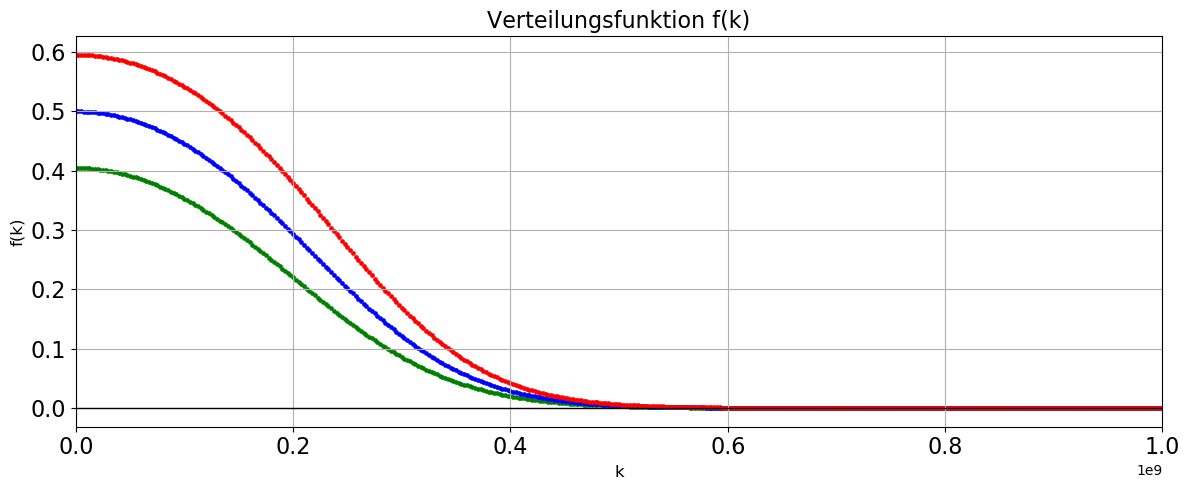

In [8]:
#plot Verteilungsfunktion
%matplotlib inline

fig = plt.figure(num=None, figsize=(12,5), dpi=100, facecolor='w', edgecolor='k')
ax0=plt.subplot(1,1,1) #2x1 subplots, select 1 plot

#main title
#fig.suptitle('Main Title', fontsize=20, y=1., x=.5)

k_=np.linspace(0,1e+9,401)
#k_=np.logspace(0,9,1001)

ax0.scatter(k_,f(c[0],k_),color="green", linewidth=2, s=2, label=r"$E_G-\mu=10e-3$")
ax0.scatter(k_,f(c[1],k_),color="blue", linewidth=2, s=2, label=r"$E_G-\mu=0$")
ax0.scatter(k_,f(c[2],k_),color="red", linewidth=2, s=2, label=r"$E_G-\mu=-10e-3$")
ax0.axhline(0, color='black', lw=1)

#labels
#ax0.legend(fontsize=12, bbox_to_anchor=(0.9,0.9))
ax0.set_title('Fermiverteilung f(k)', fontsize=16, y=0.9, x=.5)
ax0.set_xlabel('k', fontsize=12)
ax0.set_ylabel('f(k)', fontsize=12)
ax0.tick_params(axis='both', which='major', labelsize=16)
#title space
tt0 = ax0.title
tt0.set_position([.5, 1])

#dimensions & ticks
#ax0.set_yscale('log')
#ax0.set_ylim(-0.05,1.05)
#ax0.set_xscale('log')
ax0.set_xlim(0,1e+9)
ax0.grid(True)
#ax0.axis('equal')

fig.gca().set_autoscale_on(False)
plt.tight_layout()
plt.show()

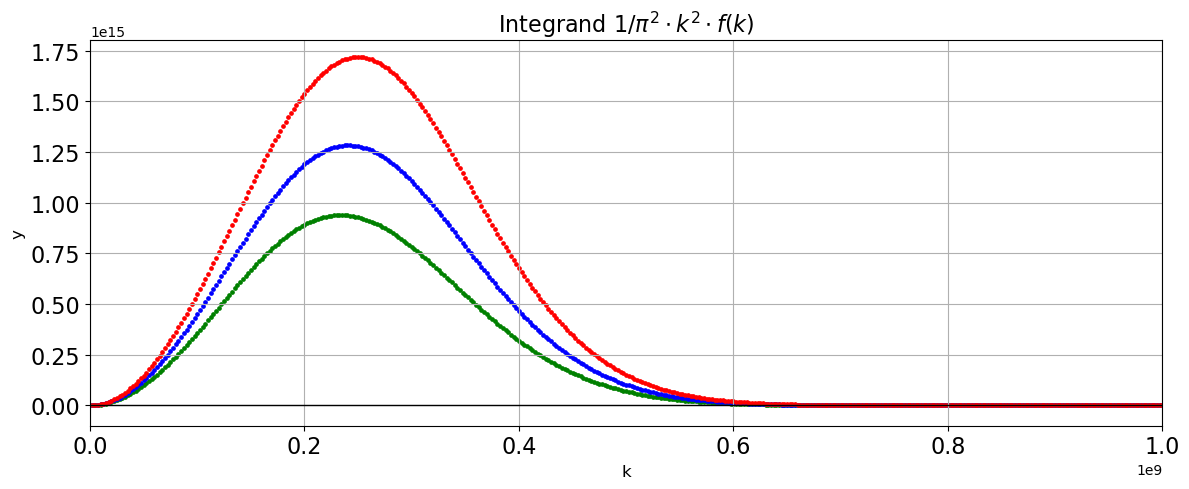

In [10]:
#plot Integrand
%matplotlib inline

fig = plt.figure(num=None, figsize=(12,5), dpi=100, facecolor='w', edgecolor='k')
ax0=plt.subplot(1,1,1) #2x1 subplots, select 1 plot

#main title
#fig.suptitle('Main Title', fontsize=20, y=1., x=.5)

#b=np.logspace(0,9,401)
b=np.linspace(0,1e+9,401)

#for ii in range(0,51):
#    i = lambda k: df(c[0],k)
#    ax0.scatter(b[ii],trapez_integration(a,b[ii],N,i),color="green", linewidth=2, s=2)
#    i = lambda k: df(c[1],k)
#    ax0.scatter(b[ii],trapez_integration(a,b[ii],N,i),color="blue", linewidth=2, s=2)
#    i = lambda k: df(c[2],k)
#    ax0.scatter(b[ii],trapez_integration(a,b[ii],N,i),color="red", linewidth=2, s=2)

ax0.scatter(b,df(c[0],b),color="green", linewidth=2, s=2)
ax0.scatter(b,df(c[1],b),color="blue", linewidth=2, s=2)
ax0.scatter(b,df(c[2],b),color="red", linewidth=2, s=2)

#plot
ax0.axhline(0, color='black', lw=1)

#labels
#ax0.legend(fontsize=12, bbox_to_anchor=(0.9,0.9))
ax0.set_title('Integrand $ 1/\pi^2 \cdot k^2 \cdot f(k)$', fontsize=16, y=0.9, x=.5)
ax0.set_xlabel('k', fontsize=12)
ax0.set_ylabel('y', fontsize=12)
ax0.tick_params(axis='both', which='major', labelsize=16)
#title space
tt0 = ax0.title
tt0.set_position([.5, 1])

#dimensions & ticks
#ax0.set_xticks([0,1,2,4,6,8,10])
#ax0.set_yticks(np.linspace(-2,0,3))
ax0.set_ylim(-0.1e+15,1.8e+15)
ax0.set_xlim(0,1e+9)
#ax0.set_yscale('log')
#ax0.set_ylim(16)
#ax0.set_xscale('log')
#ax0.set_xlim(10)
ax0.grid(True)
#ax0.axis('equal')

fig.gca().set_autoscale_on(False)
plt.tight_layout()
plt.show()

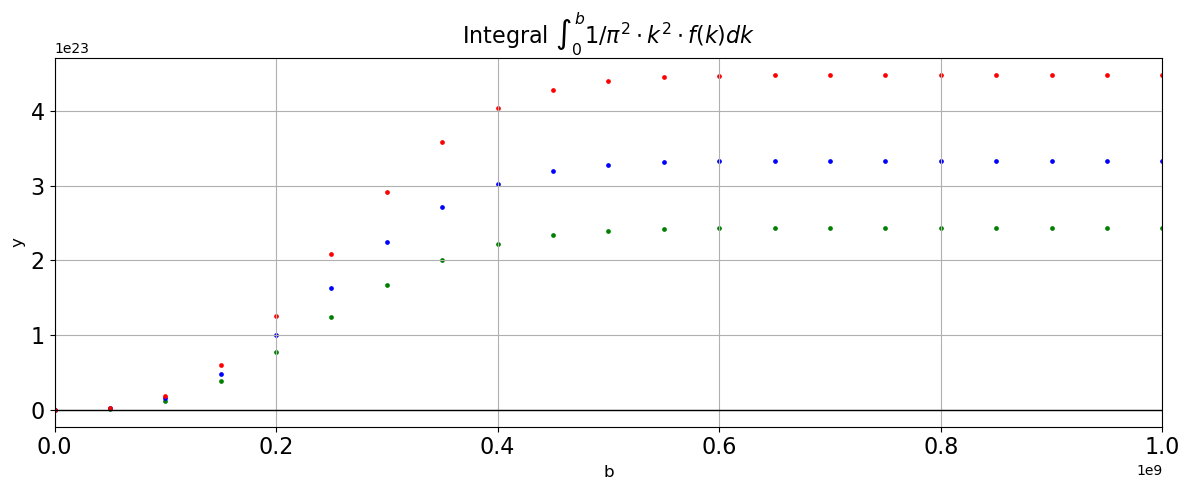

In [11]:
#plot Integrationsergebnis mit unterschiedlicher oberer Grenze b
%matplotlib inline

fig = plt.figure(num=None, figsize=(12,5), dpi=100, facecolor='w', edgecolor='k')
ax0=plt.subplot(1,1,1) #2x1 subplots, select 1 plot

#main title
#fig.suptitle('Main Title', fontsize=20, y=1., x=.5)

#b=np.logspace(0,9,21)
a=0
N=1e+7
b=np.linspace(0,1e+9,21)

for ii in range(0,21):
    i = lambda k: df(c[0],k)
    ax0.scatter(b[ii],trapez_integration(a,b[ii],N,i),color="green", linewidth=2, s=2)
    i = lambda k: df(c[1],k)
    ax0.scatter(b[ii],trapez_integration(a,b[ii],N,i),color="blue", linewidth=2, s=2)
    i = lambda k: df(c[2],k)
    ax0.scatter(b[ii],trapez_integration(a,b[ii],N,i),color="red", linewidth=2, s=2)

#ax0.scatter(b,df(c[0],b),color="green", linewidth=2, s=2)
#ax0.scatter(b,df(c[1],b),color="blue", linewidth=2, s=2)
#ax0.scatter(b,df(c[2],b),color="red", linewidth=2, s=2)

#plot
ax0.axhline(0, color='black', lw=1)

#labels
#ax0.legend(fontsize=12, bbox_to_anchor=(0.9,0.9))
ax0.set_title('Integral $ \int_0^b 1/\pi^2 \cdot k^2 \cdot f(k) dk$', fontsize=16, y=0.9, x=.5)
ax0.set_xlabel('b', fontsize=12)
ax0.set_ylabel('y', fontsize=12)
ax0.tick_params(axis='both', which='major', labelsize=16)
#title space
tt0 = ax0.title
tt0.set_position([.5, 1])

#dimensions & ticks
#ax0.set_xticks([0,1,2,4,6,8,10])
#ax0.set_yticks(np.linspace(-2,0,3))
#ax0.set_yscale('log')
#ax0.set_ylim(-0.05,1.05)
#ax0.set_xscale('log')
ax0.set_xlim(0,1e+9)
ax0.grid(True)
#ax0.axis('equal')

fig.gca().set_autoscale_on(False)
plt.tight_layout()
plt.show()

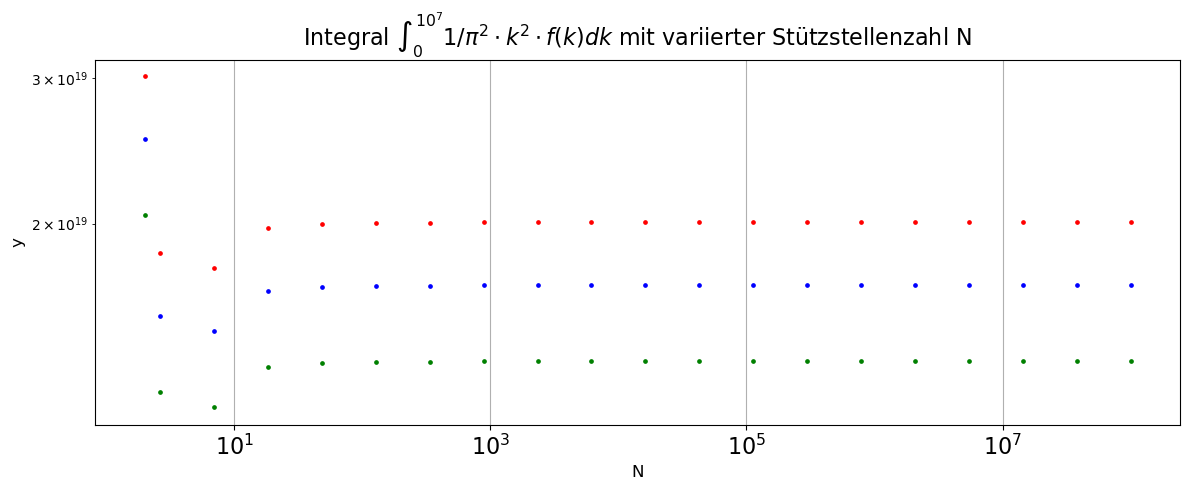

In [30]:
#plot Integrationsergebnis mit unterschiedlicher Stützstellenzahl N
%matplotlib inline

fig = plt.figure(num=None, figsize=(12,5), dpi=100, facecolor='w', edgecolor='k')
ax0=plt.subplot(1,1,1) #2x1 subplots, select 1 plot

#main title
#fig.suptitle('Main Title', fontsize=20, y=1., x=.5)

a=0
b=1e+7
n=np.logspace(0,8,20)
n[0]+=1

for N in n:
    i = lambda k: df(c[0],k)
    ax0.scatter(N,trapez_integration(a,b,N,i),color="green", linewidth=2, s=2)
    i = lambda k: df(c[1],k)
    ax0.scatter(N,trapez_integration(a,b,N,i),color="blue", linewidth=2, s=2)
    i = lambda k: df(c[2],k)
    ax0.scatter(N,trapez_integration(a,b,N,i),color="red", linewidth=2, s=2)

#ax0.scatter(b,df(c[0],b),color="green", linewidth=2, s=2)
#ax0.scatter(b,df(c[1],b),color="blue", linewidth=2, s=2)
#ax0.scatter(b,df(c[2],b),color="red", linewidth=2, s=2)

#plot
ax0.axhline(0, color='black', lw=1)

#labels
#ax0.legend(fontsize=12, bbox_to_anchor=(0.9,0.9))
ax0.set_title('Integral $ \int_0^{10^7} 1/\pi^2 \cdot k^2 \cdot f(k) dk$ mit variierter Stützstellenzahl N', fontsize=16, y=0.9, x=.5)
ax0.set_xlabel('N', fontsize=12)
ax0.set_ylabel('y', fontsize=12)
ax0.tick_params(axis='both', which='major', labelsize=16)
#title space
tt0 = ax0.title
tt0.set_position([.5, 1])

#dimensions & ticks
#ax0.set_xticks([0,1,2,4,6,8,10])
#ax0.set_yticks(np.linspace(-2,0,3))
ax0.set_yscale('log')
#ax0.set_ylim(0,24)
ax0.set_xscale('log')
#ax0.set_xlim(0,9)
ax0.grid(True)
#ax0.axis('equal')

fig.gca().set_autoscale_on(False)
plt.tight_layout()
plt.show()

In [34]:
#Berechnung der Teilchendichten
for jjj in range(0,3):
    a=0
    b=1e+9
    N=1e+8
    i = lambda k: df(c[jjj],k)
    result = trapez_integration(a,b,N,i)*1e-6
    print('Teilchendichte n = ',result,'cm3$ bei einer Bandlücke von $',c[jjj]/e*1e+3,'meV \n')

Teilchendichte n =  2.4300417818288406e+17 cm3$ bei einer Bandlücke von $ 10.0 meV
Teilchendichte n =  3.32988401334506e+17 cm3$ bei einer Bandlücke von $ 0.0 meV
Teilchendichte n =  4.4765322402136864e+17 cm3$ bei einer Bandlücke von $ -10.0 meV


-----

### chemisches Potential $E_G-\mu$ bei vorgegebener Teilchendichte berechnen
mit der Methode der Intervallschachtelung für folgende Teilchendichten:<br>
$n = 10^{10} \,\text{cm}^3$; $n = 10^{11} \,\text{cm}^3$; $n = 10^{12} \,\text{cm}^3$;

In [43]:
#chemisches Potential berechnet mit intervallschachtelung für einige Teilchendichten
a=0
b=1e+9
N=1e+7

d=[]

#n = 1e+10
for n in [1e+22,1e+23,1e+24]:
    mu_a=-1e+1*1.602176634e-19;mu_b=+1e+1*1.602176634e-19
    for jj in range(0,20):
        mu_half = mu_a + (mu_b - mu_a)/2
        i = lambda k: df(mu_half,k)
        n_result = trapez_integration(a,b,N,i)
        if n_result>n:
            mu_a = mu_half
        elif n_result<n:
            mu_b = mu_half

    i = lambda k: df(mu_a,k)
    o1 = trapez_integration(a,b,N,i)
    i = lambda k: df(mu_b,k)
    o2 = trapez_integration(a,b,N,i)

    print('Teilchendichte n=',n/1e+6,'cm3')
    #print('n : ',o1,o2)
    #print('$E_G - \mu$ : ',mu_a,mu_b)
    
    if np.abs(o1-n) < np.abs(o2-0.5):
        print('Bandlücke: ',mu_a/e*1e+3,'meV \n')
        d.append(mu_a)
    else:
        print('Bandlücke: ',n/e*1e+3,'meV \n')
        d.append(mu_b)


Teilchendichte n= 1e+16 cm3
Bandlücke:  97.33200073242189 meV 

Teilchendichte n= 9.999999999999998e+16 cm3
Bandlücke:  35.915374755859375 meV 

Teilchendichte n= 1e+18 cm3
Bandlücke:  -41.8853759765625 meV 



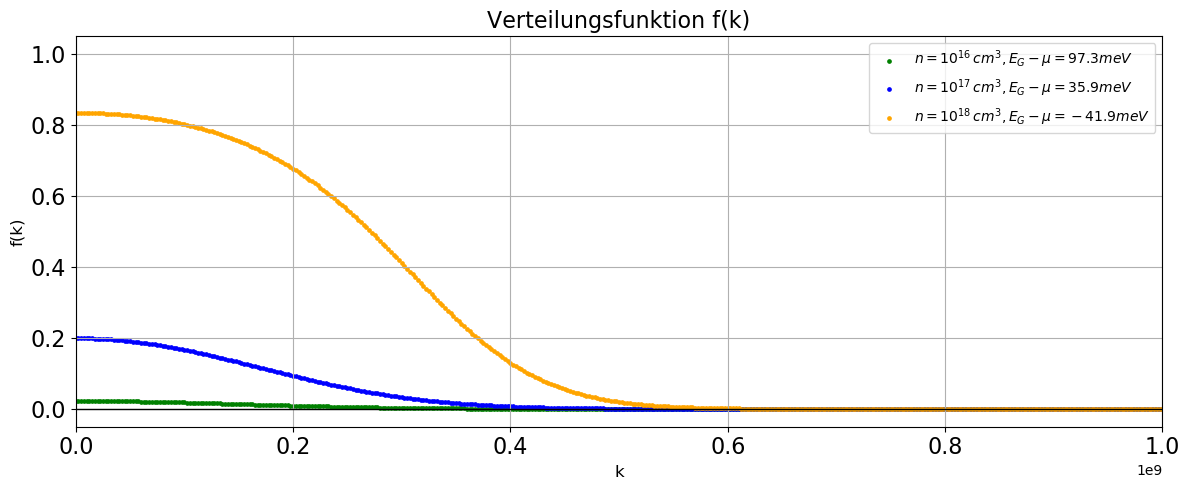

In [52]:
#plot der Verteilungsfunktionen für berechnete chemische Potentiale
%matplotlib inline

fig = plt.figure(num=None, figsize=(12,5), dpi=100, facecolor='w', edgecolor='k')
ax0=plt.subplot(1,1,1) #2x1 subplots, select 1 plot

#main title
#fig.suptitle('Main Title', fontsize=20, y=1., x=.5)

k_=np.linspace(0,1e+9,401)
#k_=np.logspace(0,9,1001)

ax0.scatter(k_,f(d[0],k_),color="green", label='$n = 10^{16} \,{cm}^3, E_G - \mu = 97.3 meV$', linewidth=2, s=2)
ax0.scatter(k_,f(d[1],k_),color="blue", label='$n = 10^{17} \,{cm}^3, E_G - \mu = 35.9 meV$', linewidth=2, s=2)
ax0.scatter(k_,f(d[2],k_),color="orange", label='$n = 10^{18} \,{cm}^3, E_G - \mu = -41.9 meV$', linewidth=2, s=2)
ax0.axhline(0, color='black', lw=1)
ax0.legend()

#labels
#ax0.legend(fontsize=12, bbox_to_anchor=(0.9,0.9))
ax0.set_title('Verteilungsfunktion f(k)', fontsize=16, y=0.9, x=.5)
ax0.set_xlabel('k', fontsize=12)
ax0.set_ylabel('f(k)', fontsize=12)
ax0.tick_params(axis='both', which='major', labelsize=16)
#title space
tt0 = ax0.title
tt0.set_position([.5, 1])

#dimensions & ticks
#ax0.set_yscale('log')
ax0.set_ylim(-0.05,1.05)
#ax0.set_xscale('log')
ax0.set_xlim(0,1e+9)
ax0.grid(True)
#ax0.axis('equal')

fig.gca().set_autoscale_on(False)
plt.tight_layout()
plt.show()